# Import Libraries

In [20]:
# Importing libraries
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer
from sklearn.feature_selection import SelectPercentile , mutual_info_classif
from sklearn.cluster import KMeans , SpectralClustering , AgglomerativeClustering

import seaborn as sns

In [2]:
with open('Labels_TargetFeatures.txt') as LabelsName:
    Target = LabelsName.readline().strip()
    Features = LabelsName.readline().split()

# General Sub-Model 

The four sub-models have the same architecture:
1. Feature transformation
2. Feature selection
3. Clustering algorithm
4. Output probabilities

K-Means, Spectral Clustering and Agglomerative Clustering were used as clustering algorithms

In [14]:
# Loading Dataset
ObesityDataset_Groups = pd.read_csv('../Exploratory_Data_Analysis/ObesityLevel_Groups.csv',index_col=0)
X_features_groups = ObesityDataset_Groups[Features].to_numpy()
y_target_groups = ObesityDataset_Groups[Target].to_numpy()

# Split train-test
X_train , X_test , y_train , y_test = train_test_split(X_features_groups,y_target_groups,test_size=0.2)

In [52]:
ScoreFunction_MutualInformation = lambda X,y : mutual_info_classif(X,y,n_neighbors=16)

# Clustering with K-Means
Model_K_Means = Pipeline(steps=[('Normalization',QuantileTransformer(output_distribution='normal')),
                                ('Feature_Selection',SelectPercentile(score_func=ScoreFunction_MutualInformation,percentile=50)),
                                ('Clustering',KMeans(n_clusters=3,algorithm='lloyd'))])

# Clustering with Spectral Clustering
Model_Spectral = Pipeline(steps=[('Normalization',QuantileTransformer(output_distribution='normal')),
                                 ('Feature_Selection',SelectPercentile(score_func=ScoreFunction_MutualInformation,percentile=50)),
                                 ('Clustering',SpectralClustering(n_clusters=3,n_jobs=4))])

# Clustering with Agglomerative Clustering
Model_Agglomerative = Pipeline(steps=[('Normalization',QuantileTransformer(output_distribution='normal')),
                                      ('Feature_Selection',SelectPercentile(score_func=ScoreFunction_MutualInformation,percentile=50)),
                                      ('Clustering',AgglomerativeClustering(n_clusters=3))])

<Axes: >

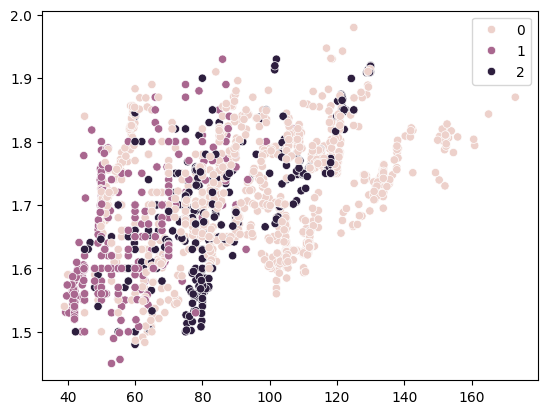

In [53]:
y_output = Model_K_Means.fit_predict(X_train,y_train)
sns.scatterplot(x=X_train[:,2],y=X_train[:,1],hue=y_output)

<Axes: xlabel='Weight', ylabel='Height'>

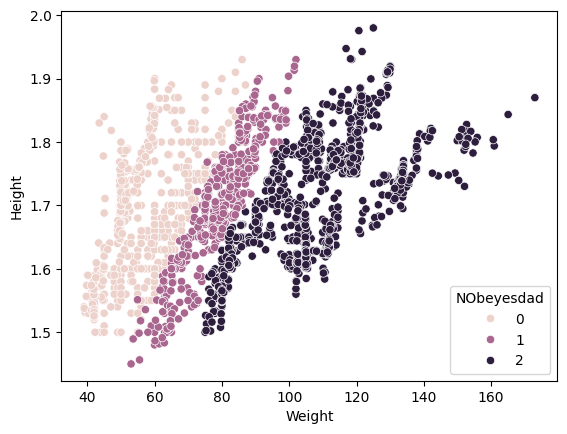

In [43]:
sns.scatterplot(ObesityDataset_Groups,x='Weight',y='Height',hue='NObeyesdad')